In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import sklearn
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import scikitplot as skplt
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.model_selection import StratifiedKFold
from logitreg.logitreg import charts as ch, iv, lreg
import scorecardpy
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, auc
from mdl_evaluation_plots import *


%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve2(estimator, title, X, y, axes=None, ylim=None, cv=5,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring = 'recall'):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes, scoring = scoring,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [3]:
# Reference: 

"""
https://www.mathworks.com/help/fininst/prepayment-modeling-with-a-two-factor-hull-white-model.html
"""

'\nhttps://www.mathworks.com/help/fininst/prepayment-modeling-with-a-two-factor-hull-white-model.html\n'

In [30]:
def round_sig(x, N=2):
    """
    round to N significant digits
    :param x: input
    :param N: # of digits
    :return:
    """

    if np.floor(np.log10(abs(x))) == np.inf:
        # -1 for invalid zero division.
        return -1

    return 0 if x == 0 else round(x, N - int(np.floor(np.log10(abs(x)))))

In [412]:
# Read the data in chunks


chunks = pd.read_csv('C:/Users/scui/Downloads/data-full.csv', chunksize = 40000)
df_full = pd.DataFrame()
for chunk in chunks:
    df_full = df_full.append(chunk)
df_full.reset_index(drop=True, inplace=True)
df_full.head()


,loan_id,deal_no,factor_date,last_date,dflt_flag,eb,tp,inv_bal,close_bal,wala,mba,mtl,issuer,svcr,init_rate,close_date,mba_prev,mba_prev2,mba_prev6,mba_code,mba_prev_code,mba_apr,last_mba,inv_bal_p1,inv_bal_p2,tp_dflt,tp_vol,d30_bal,d60_bal,d90p_bal,dqt_bal,dflt_amt,loss_amt,loss_amt_inact,noloss_dflt_flag,noloss_dflt,sev,sev_bucket,inv_bal_sdq_p1,ltv,cltv,fico_bucket,oltv_bucket,cltv_bucket,olsz_bucket,clsz_bucket,geo,occ_bucket,purp_bucket,mod_date,iss_bal_atdt,doc_type,covid_flag,ptd_actual,ptd_reported,first_covid_date,pre_covid_ptd,cd_servicer,cd_mstr_servicer,cd_defer_delta,mba_imp,mba_imp_prev,mba_imp_code,mba_imp_prev_code,covid_flag_adj,deal_cpn,?column?,covid_flag_adj_prev,ever_covid_before_flag_adj,covid_end_flag,covid_start_flag,covid_restart_flag,is_prepay
0,AEvnnR,AA181,2018-05-01,2019-12-01,0,0.00,0.00,613218.72,613218.72,5,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,NaN,NaN,NaN,1,NaN,0,C,NaN,NaN,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,66.826350,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,1,NaN,0,5.27773,1,NaN,0,0,0,0,0
1,AEvnnR,AA181,2018-06-01,2019-12-01,0,612516.01,706.96,611809.05,613218.72,6,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,C,NaN,NaN,1,1.0,0,C,613218.72,NaN,0.0,706.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,66.353530,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.27773,1,0.0,0,0,0,0,0
2,AEvnnR,AA181,2018-07-01,2019-12-01,0,611100.02,840.11,610259.91,613218.72,7,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,C,C,NaN,1,1.0,0,C,611809.05,613218.72,0.0,840.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,65.921729,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.27773,1,0.0,0,0,0,0,0
3,AEvnnR,AA181,2018-08-01,2019-12-01,0,609543.95,-2.38,609546.33,613218.72,8,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,C,C,NaN,1,1.0,0,C,610259.91,611809.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,65.710023,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.27773,1,0.0,0,0,0,0,0
4,AEvnnR,AA181,2018-09-01,2019-12-01,0,608827.17,840.12,607987.05,613218.72,9,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,C,C,NaN,1,1.0,0,C,609546.33,610259.91,0.0,840.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,65.519354,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.27773,1,0.0,0,0,0,0,0


Save file for faster reload next time

In [413]:
df_full = df_full.drop('is_prepay', axis = 1)

In [414]:
# Prepay label
prepay_label = df_full.apply(lambda row: 1 if ((row['dflt_flag'] == 0) & (row['eb'] > 0) & (row['tp_vol'] > 0) & 
                                             (row['inv_bal'] == 0)) else 0, axis = 1)
df_full['is_prepay'] = prepay_label

In [417]:
import joblib
joblib.dump(df_full, 'prepay_data.pkl')

['prepay_data.pkl']

Load data from saved pickle file

In [348]:
import joblib
df_full = joblib.load('prepay_data.pkl')

In [349]:
df_full

,loan_id,deal_no,factor_date,last_date,dflt_flag,eb,tp,inv_bal,close_bal,wala,mba,mtl,issuer,svcr,init_rate,close_date,mba_prev,mba_prev2,mba_prev6,mba_code,mba_prev_code,mba_apr,last_mba,inv_bal_p1,inv_bal_p2,tp_dflt,tp_vol,d30_bal,d60_bal,d90p_bal,dqt_bal,dflt_amt,loss_amt,loss_amt_inact,noloss_dflt_flag,noloss_dflt,sev,sev_bucket,inv_bal_sdq_p1,ltv,cltv,fico_bucket,oltv_bucket,cltv_bucket,olsz_bucket,clsz_bucket,geo,occ_bucket,purp_bucket,mod_date,iss_bal_atdt,doc_type,covid_flag,ptd_actual,ptd_reported,first_covid_date,pre_covid_ptd,cd_servicer,cd_mstr_servicer,cd_defer_delta,mba_imp,mba_imp_prev,mba_imp_code,mba_imp_prev_code,covid_flag_adj,deal_cpn,?column?,covid_flag_adj_prev,ever_covid_before_flag_adj,covid_end_flag,covid_start_flag,covid_restart_flag,is_prepay
0,AEvnnR,AA181,2018-05-01,2019-12-01,0,0.00,0.00,613218.72,613218.72,5,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,NaN,NaN,NaN,1,NaN,0,C,NaN,NaN,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,66.826350,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,1,NaN,0,5.277730,1,NaN,0,0,0,0,0
1,AEvnnR,AA181,2018-06-01,2019-12-01,0,612516.01,706.96,611809.05,613218.72,6,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,C,NaN,NaN,1,1.0,0,C,613218.72,NaN,0.0,706.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,66.353530,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.277730,1,0.0,0,0,0,0,0
2,AEvnnR,AA181,2018-07-01,2019-12-01,0,611100.02,840.11,610259.91,613218.72,7,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,C,C,NaN,1,1.0,0,C,611809.05,613218.72,0.0,840.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,65.921729,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.277730,1,0.0,0,0,0,0,0
3,AEvnnR,AA181,2018-08-01,2019-12-01,0,609543.95,-2.38,609546.33,613218.72,8,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,C,C,NaN,1,1.0,0,C,610259.91,611809.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,65.710023,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.277730,1,0.0,0,0,0,0,0
4,AEvnnR,AA181,2018-09-01,2019-12-01,0,608827.17,840.12,607987.05,613218.72,9,C,1.0,Arroyo,UNKNOWN,5.375,2018-05-17,C,C,NaN,1,1.0,0,C,609546.33,610259.91,0.0,840.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,65.519354,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,NaN,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.277730,1,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007995,BoqaSh,VR9I3,2021-03-01,NaN,0,470725.30,0.00,470725.30,479886.31,21,C,NaN,Verus,UNKNOWN,5.875,2019-11-25,C,C,C,1,1.0,C,NaN,471287.50,471846.97,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,59.722686,NaN,60 - 79,60 - 79,400-600k,400-600k,FL,investor,Purchase,NaN,0.0,Investor,N,2021-02-01 00:00:00,2021-02-01,NaN,NaN,UNKNOWN,unknown,NaN,C,C,1,1.0,0,6.859634,1,0.0,0,0,0,0,0
1007996,BoqaSh,VR9I3,2021-04-01,NaN,0,470160.34,0.00,470160.34,479886.31,22,C,NaN,Verus,UNKNOWN,5.875,2019-11-25,C,C,C,1,1.0,C,NaN,470725.30,471287.50,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,58.774321,NaN,60 - 79,60 - 79,400-600k,400-600k,FL,investor,Purchase,NaN,0.0,Investor,N,2021-03-01 00:00:00,2021-03-01,NaN,NaN,UNKNOWN,unknown,NaN,C,C,1,1.0,0,6.859634,1,0.0,0,0,0,0,0
1007997,BoqaSh,VR9I3,2021-05-01,NaN,0,469592.62,0.00,469592.62,479886.31,23,C,NaN,Verus,UNKNOWN,5.875,2019-11-25,C,C,C,1,1.0,C,NaN,470160.34,470725.30,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0,0.0,70.0,57.654461,NaN,60 - 79,60 - 79,400-600k,400-600k,FL,investor,Purchase,NaN,0.0,Investor,N,2021-05-01 00

Remove columns that have only 1 value/ID columns

In [350]:
df = df_full.drop(['deal_no', '?column?', 'cd_defer_delta'], axis = 1)

In [351]:
# Y column name
y_var = 'is_prepay'

In [352]:
# Drop rows where dates are null while there is a prepayment
df = df.drop(df.loc[(df[y_var] == 1) & ((df['factor_date'].isnull()) | 
                    (df['last_date'].isnull()) | (df['close_date'].isnull()))].index).reset_index(drop = True)

In [353]:
df[['factor_date', 'last_date', 'close_date', 'mod_date']] = pd.to_datetime(df[['factor_date', 'last_date', 'close_date', 'mod_date']].stack(), format="%Y-%m-%d").unstack()

In [354]:
df['factor_month'] = df['factor_date'].dt.month
df['factor_year'] = df['factor_date'].dt.year
df['last_month'] = df['last_date'].dt.month
df['last_year'] = df['last_date'].dt.year
df['close_month'] = df['close_date'].dt.month
df['close_year'] = df['close_date'].dt.year
df['mod_month'] = df['mod_date'].dt.month
df['mod_year'] = df['mod_date'].dt.year
df.drop(['factor_date', 'last_date', 'close_date', 'mod_date'], axis = 1, inplace=True)

In [355]:
# Only select loans that are already ended. Is that necessary?
#df_with_last_date = df.loc[~(pd.isnull(df['last_year']) | pd.isnull(df['last_month']))].reset_index(drop = True)
#len(df_with_last_date)

In [356]:
df = df.drop(['tp', 'tp_vol', 'tp_dflt'], axis = 1)

In [357]:
df_full.sev.isnull().sum()

1007986

In [358]:
df = df.drop(['sev'], axis = 1)

In [359]:
print('Ratio of Prepayment: ', len(df.loc[df[y_var] == 1]) / len(df[y_var]))

Ratio of Prepayment:  0.025756995549594344


In [360]:
# TODO: What to fill for dates?

df[['last_month', 'last_year', 'mod_month', 'mod_year']] = df[['last_month', 'last_year', 'mod_month', 'mod_year']].fillna(0)

In [361]:
# Prepay and modification never happen in the same month
df['mod_month'].loc[df[y_var] == 1].unique()

array([0.])

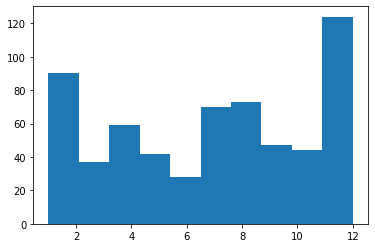

In [362]:
# Months when modifications are likely to happen
plt.hist(df['mod_month'].loc[df['mod_month'] != 0])
plt.show()

In [363]:
month_mod = df.apply(lambda row: 1 if (row['mod_month'] != 0) else 0, axis = 1)
df['month_mod'] = month_mod

In [364]:
loan_mod = df['loan_id'].loc[df['month_mod'] == 1].unique()
df['has_been_mod'] = df.apply(lambda row: 1 if (row['loan_id'] in loan_mod) else 0, axis = 1)

In [365]:
# Probability when a modified loan is prepaid.
print('Probability when a modified loan is prepaid: ', len(df.loc[(df['has_been_mod'] == 1) & (df[y_var] == 1)]) / len(df.loc[df[y_var] == 1]))

Probability when a modified loan is prepaid:  0.0032353734160150984


In [ ]:
# TODO: Look at trends

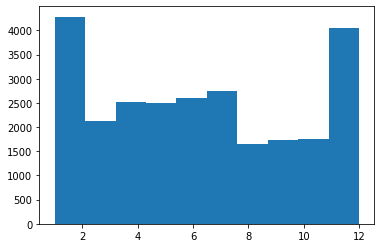

In [366]:
# Months when prepayments are more likely to happen


# Should be lowest?

plt.hist(df['last_month'].loc[df[y_var] == 1])
plt.show()

In [367]:
df.head()

,loan_id,dflt_flag,eb,inv_bal,close_bal,wala,mba,mtl,issuer,svcr,init_rate,mba_prev,mba_prev2,mba_prev6,mba_code,mba_prev_code,mba_apr,last_mba,inv_bal_p1,inv_bal_p2,d30_bal,d60_bal,d90p_bal,dqt_bal,dflt_amt,loss_amt,loss_amt_inact,noloss_dflt_flag,noloss_dflt,sev_bucket,inv_bal_sdq_p1,ltv,cltv,fico_bucket,oltv_bucket,cltv_bucket,olsz_bucket,clsz_bucket,geo,occ_bucket,purp_bucket,iss_bal_atdt,doc_type,covid_flag,ptd_actual,ptd_reported,first_covid_date,pre_covid_ptd,cd_servicer,cd_mstr_servicer,mba_imp,mba_imp_prev,mba_imp_code,mba_imp_prev_code,covid_flag_adj,deal_cpn,covid_flag_adj_prev,ever_covid_before_flag_adj,covid_end_flag,covid_start_flag,covid_restart_flag,is_prepay,factor_month,factor_year,last_month,last_year,close_month,close_year,mod_month,mod_year,month_mod,has_been_mod
0,AEvnnR,0,0.00,613218.72,613218.72,5,C,1.0,Arroyo,UNKNOWN,5.375,NaN,NaN,NaN,1,NaN,0,C,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,70.0,66.826350,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,1,NaN,0,5.27773,NaN,0,0,0,0,0,5,2018,12.0,2019.0,5,2018,0.0,0.0,0,0
1,AEvnnR,0,612516.01,611809.05,613218.72,6,C,1.0,Arroyo,UNKNOWN,5.375,C,NaN,NaN,1,1.0,0,C,613218.72,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,70.0,66.353530,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.27773,0.0,0,0,0,0,0,6,2018,12.0,2019.0,5,2018,0.0,0.0,0,0
2,AEvnnR,0,611100.02,610259.91,613218.72,7,C,1.0,Arroyo,UNKNOWN,5.375,C,C,NaN,1,1.0,0,C,611809.05,613218.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,70.0,65.921729,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.27773,0.0,0,0,0,0,0,7,2018,12.0,2019.0,5,2018,0.0,0.0,0,0
3,AEvnnR,0,609543.95,609546.33,613218.72,8,C,1.0,Arroyo,UNKNOWN,5.375,C,C,NaN,1,1.0,0,C,610259.91,611809.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,70.0,65.710023,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.27773,0.0,0,0,0,0,0,8,2018,12.0,2019.0,5,2018,0.0,0.0,0,0
4,AEvnnR,0,608827.17,607987.05,613218.72,9,C,1.0,Arroyo,UNKNOWN,5.375,C,C,NaN,1,1.0,0,C,609546.33,610259.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,70.0,65.519354,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.27773,0.0,0,0,0,0,0,9,2018,12.0,2019.0,5,2018,0.0,0.0,0,0


In [368]:
# Boolean col for checking if the factor month is jan/dec
df['factor_month_is_janordec'] = df.apply(lambda row: 1 if ((row['factor_month'] == 12) or 
                                                      (row['factor_month'] == 1)) else 0, axis = 1)

In [369]:
df = df.drop(['mod_month', 'last_month'], axis = 1).reset_index(drop = True)
df.head()

,loan_id,dflt_flag,eb,inv_bal,close_bal,wala,mba,mtl,issuer,svcr,init_rate,mba_prev,mba_prev2,mba_prev6,mba_code,mba_prev_code,mba_apr,last_mba,inv_bal_p1,inv_bal_p2,d30_bal,d60_bal,d90p_bal,dqt_bal,dflt_amt,loss_amt,loss_amt_inact,noloss_dflt_flag,noloss_dflt,sev_bucket,inv_bal_sdq_p1,ltv,cltv,fico_bucket,oltv_bucket,cltv_bucket,olsz_bucket,clsz_bucket,geo,occ_bucket,purp_bucket,iss_bal_atdt,doc_type,covid_flag,ptd_actual,ptd_reported,first_covid_date,pre_covid_ptd,cd_servicer,cd_mstr_servicer,mba_imp,mba_imp_prev,mba_imp_code,mba_imp_prev_code,covid_flag_adj,deal_cpn,covid_flag_adj_prev,ever_covid_before_flag_adj,covid_end_flag,covid_start_flag,covid_restart_flag,is_prepay,factor_month,factor_year,last_year,close_month,close_year,mod_year,month_mod,has_been_mod,factor_month_is_janordec
0,AEvnnR,0,0.00,613218.72,613218.72,5,C,1.0,Arroyo,UNKNOWN,5.375,NaN,NaN,NaN,1,NaN,0,C,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,70.0,66.826350,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,1,NaN,0,5.27773,NaN,0,0,0,0,0,5,2018,2019.0,5,2018,0.0,0,0,0
1,AEvnnR,0,612516.01,611809.05,613218.72,6,C,1.0,Arroyo,UNKNOWN,5.375,C,NaN,NaN,1,1.0,0,C,613218.72,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,70.0,66.353530,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.27773,0.0,0,0,0,0,0,6,2018,2019.0,5,2018,0.0,0,0,0
2,AEvnnR,0,611100.02,610259.91,613218.72,7,C,1.0,Arroyo,UNKNOWN,5.375,C,C,NaN,1,1.0,0,C,611809.05,613218.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,70.0,65.921729,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.27773,0.0,0,0,0,0,0,7,2018,2019.0,5,2018,0.0,0,0,0
3,AEvnnR,0,609543.95,609546.33,613218.72,8,C,1.0,Arroyo,UNKNOWN,5.375,C,C,NaN,1,1.0,0,C,610259.91,611809.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,70.0,65.710023,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.27773,0.0,0,0,0,0,0,8,2018,2019.0,5,2018,0.0,0,0,0
4,AEvnnR,0,608827.17,607987.05,613218.72,9,C,1.0,Arroyo,UNKNOWN,5.375,C,C,NaN,1,1.0,0,C,609546.33,610259.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,70.0,65.519354,680-739,60 - 79,60 - 79,600k-1mm,600k-1mm,CA,investor,Purchase,0.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,1,1.0,0,5.27773,0.0,0,0,0,0,0,9,2018,2019.0,5,2018,0.0,0,0,0


In [370]:
# Drop derived columns 
# Or not?

# Remove orig-balance-bucket,oltv, olsz buckets, keep closing bal, numerical columns ---- or inverse?
# sev? -- if sev ==0, it is definitely not prepay. mba_imp?
df = df.drop(['dflt_flag', 'mba_code', 'mba_prev_code', 'mba_prev6', 'mba',
            'd30_bal', 'd60_bal', 'd90p_bal', 'dqt_bal','dflt_amt', 
            'loss_amt', 'loss_amt_inact', 'noloss_dflt_flag', 'noloss_dflt', 'sev_bucket', 'oltv_bucket', 
            'cltv_bucket', 'olsz_bucket', 'clsz_bucket', 'inv_bal_sdq_p1', 'iss_bal_atdt', 'mba_imp', 
            'mba_imp_prev', 'mba_imp_code', 'covid_flag_adj', 'covid_flag_adj_prev', 'ever_covid_before_flag_adj', 
            'covid_end_flag', 'covid_start_flag', 'covid_restart_flag', 'mba_imp_prev_code'], axis = 1)

# drop ltv, keep cltv
# df = df.drop('ltv', axis = 1)

df.head()

,loan_id,eb,inv_bal,close_bal,wala,mtl,issuer,svcr,init_rate,mba_prev,mba_prev2,mba_apr,last_mba,inv_bal_p1,inv_bal_p2,ltv,cltv,fico_bucket,geo,occ_bucket,purp_bucket,doc_type,covid_flag,ptd_actual,ptd_reported,first_covid_date,pre_covid_ptd,cd_servicer,cd_mstr_servicer,deal_cpn,is_prepay,factor_month,factor_year,last_year,close_month,close_year,mod_year,month_mod,has_been_mod,factor_month_is_janordec
0,AEvnnR,0.00,613218.72,613218.72,5,1.0,Arroyo,UNKNOWN,5.375,NaN,NaN,0,C,NaN,NaN,70.0,66.826350,680-739,CA,investor,Purchase,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.27773,0,5,2018,2019.0,5,2018,0.0,0,0,0
1,AEvnnR,612516.01,611809.05,613218.72,6,1.0,Arroyo,UNKNOWN,5.375,C,NaN,0,C,613218.72,NaN,70.0,66.353530,680-739,CA,investor,Purchase,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.27773,0,6,2018,2019.0,5,2018,0.0,0,0,0
2,AEvnnR,611100.02,610259.91,613218.72,7,1.0,Arroyo,UNKNOWN,5.375,C,C,0,C,611809.05,613218.72,70.0,65.921729,680-739,CA,investor,Purchase,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.27773,0,7,2018,2019.0,5,2018,0.0,0,0,0
3,AEvnnR,609543.95,609546.33,613218.72,8,1.0,Arroyo,UNKNOWN,5.375,C,C,0,C,610259.91,611809.05,70.0,65.710023,680-739,CA,investor,Purchase,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.27773,0,8,2018,2019.0,5,2018,0.0,0,0,0
4,AEvnnR,608827.17,607987.05,613218.72,9,1.0,Arroyo,UNKNOWN,5.375,C,C,0,C,609546.33,610259.91,70.0,65.519354,680-739,CA,investor,Purchase,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.27773,0,9,2018,2019.0,5,2018,0.0,0,0,0


In [371]:
df = df.iloc[2: , :]
df = df.drop('inv_bal', axis = 1)
df

,loan_id,eb,close_bal,wala,mtl,issuer,svcr,init_rate,mba_prev,mba_prev2,mba_apr,last_mba,inv_bal_p1,inv_bal_p2,ltv,cltv,fico_bucket,geo,occ_bucket,purp_bucket,doc_type,covid_flag,ptd_actual,ptd_reported,first_covid_date,pre_covid_ptd,cd_servicer,cd_mstr_servicer,deal_cpn,is_prepay,factor_month,factor_year,last_year,close_month,close_year,mod_year,month_mod,has_been_mod,factor_month_is_janordec
2,AEvnnR,611100.02,613218.72,7,1.0,Arroyo,UNKNOWN,5.375,C,C,0,C,611809.05,613218.72,70.0,65.921729,680-739,CA,investor,Purchase,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.277730,0,7,2018,2019.0,5,2018,0.0,0,0,0
3,AEvnnR,609543.95,613218.72,8,1.0,Arroyo,UNKNOWN,5.375,C,C,0,C,610259.91,611809.05,70.0,65.710023,680-739,CA,investor,Purchase,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.277730,0,8,2018,2019.0,5,2018,0.0,0,0,0
4,AEvnnR,608827.17,613218.72,9,1.0,Arroyo,UNKNOWN,5.375,C,C,0,C,609546.33,610259.91,70.0,65.519354,680-739,CA,investor,Purchase,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.277730,0,9,2018,2019.0,5,2018,0.0,0,0,0
5,AEvnnR,607260.91,613218.72,10,1.0,Arroyo,UNKNOWN,5.375,C,C,0,C,607987.05,609546.33,70.0,65.329890,680-739,CA,investor,Purchase,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.277730,0,10,2018,2019.0,5,2018,0.0,0,0,0
6,AEvnnR,605691.42,613218.72,11,1.0,Arroyo,UNKNOWN,5.375,C,C,0,C,606424.56,607987.05,70.0,65.123821,680-739,CA,investor,Purchase,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.277730,0,11,2018,2019.0,5,2018,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007993,BoqaSh,470725.30,479886.31,21,NaN,Verus,UNKNOWN,5.875,C,C,C,NaN,471287.50,471846.97,70.0,59.722686,NaN,FL,investor,Purchase,Investor,N,2021-02-01 00:00:00,2021-02-01,NaN,NaN,UNKNOWN,unknown,6.859634,0,3,2021,0.0,11,2019,0.0,0,0,0
1007994,BoqaSh,470160.34,479886.31,22,NaN,Verus,UNKNOWN,5.875,C,C,C,NaN,470725.30,471287.50,70.0,58.774321,NaN,FL,investor,Purchase,Investor,N,2021-03-01 00:00:00,2021-03-01,NaN,NaN,UNKNOWN,unknown,6.859634,0,4,2021,0.0,11,2019,0.0,0,0,0
1007995,BoqaSh,469592.62,479886.31,23,NaN,Verus,UNKNOWN,5.875,C,C,C,NaN,470160.34,470725.30,70.0,57.654461,NaN,FL,investor,Purchase,Investor,N,2021-05-01 00:00:00,2021-05-01,NaN,NaN,UNKNOWN,unknown,6.859634,0,5,2021,0.0,11,2019,0.0,0,0,0
1007996,BoqaSh,469022.12,479886.31,24,NaN,Verus,UNKNOWN,5.875,C,C,C,NaN,469592.62,470160.34,70.0,55.706634,NaN,FL,investor,Purchase,Investor,N,2021-05-01 00:00:00,2021-05-01,NaN,NaN,UNKNOWN,unknown,6.859634,0,6,2021,0.0,11,2019,0.0,0,0,0


In [372]:
df.reset_index(drop=True, inplace= True)

In [373]:
# Remove ptd dates?
df = df.drop(['ptd_actual', 'ptd_reported'], axis = 1)

# Remove covid dates
df = df.drop(['first_covid_date', 'pre_covid_ptd'], axis = 1)

# Remove year
df = df.drop(list(df.filter(regex='year')), axis = 1)

# Remove mba_apr, last_mba --- what is mba_apr?
df = df.drop(['mba_apr', 'last_mba'], axis = 1)

In [374]:
# drop loan_id
df = df.drop('loan_id', axis = 1).reset_index(drop = True)

In [375]:
print(df.shape)
df.head()

(1007996, 28)


,eb,close_bal,wala,mtl,issuer,svcr,init_rate,mba_prev,mba_prev2,inv_bal_p1,inv_bal_p2,ltv,cltv,fico_bucket,geo,occ_bucket,purp_bucket,doc_type,covid_flag,cd_servicer,cd_mstr_servicer,deal_cpn,is_prepay,factor_month,close_month,month_mod,has_been_mod,factor_month_is_janordec
0,611100.02,613218.72,7,1.0,Arroyo,UNKNOWN,5.375,C,C,611809.05,613218.72,70.0,65.921729,680-739,CA,investor,Purchase,Other,NaN,NaN,NaN,5.27773,0,7,5,0,0,0
1,609543.95,613218.72,8,1.0,Arroyo,UNKNOWN,5.375,C,C,610259.91,611809.05,70.0,65.710023,680-739,CA,investor,Purchase,Other,NaN,NaN,NaN,5.27773,0,8,5,0,0,0
2,608827.17,613218.72,9,1.0,Arroyo,UNKNOWN,5.375,C,C,609546.33,610259.91,70.0,65.519354,680-739,CA,investor,Purchase,Other,NaN,NaN,NaN,5.27773,0,9,5,0,0,0
3,607260.91,613218.72,10,1.0,Arroyo,UNKNOWN,5.375,C,C,607987.05,609546.33,70.0,65.329890,680-739,CA,investor,Purchase,Other,NaN,NaN,NaN,5.27773,0,10,5,0,0,0
4,605691.42,613218.72,11,1.0,Arroyo,UNKNOWN,5.375,C,C,606424.56,607987.05,70.0,65.123821,680-739,CA,investor,Purchase,Other,NaN,NaN,NaN,5.27773,0,11,5,0,0,0


In [376]:
fico_bucket_mapper = {'000 - 600': 1, '620-679':2, '680-739':3, '740+':4}
df['fico_bucket'] = df['fico_bucket'].replace(fico_bucket_mapper)

In [377]:
na_column = [(i, df[i].isnull().sum()) for i in df.columns if df[i].isnull().values.any()]
na_column

[('mtl', 420087),
 ('mba_prev', 59785),
 ('mba_prev2', 119549),
 ('inv_bal_p1', 59785),
 ('inv_bal_p2', 119549),
 ('cltv', 22718),
 ('fico_bucket', 60793),
 ('doc_type', 548),
 ('covid_flag', 620370),
 ('cd_servicer', 620370),
 ('cd_mstr_servicer', 630100),
 ('deal_cpn', 43457)]

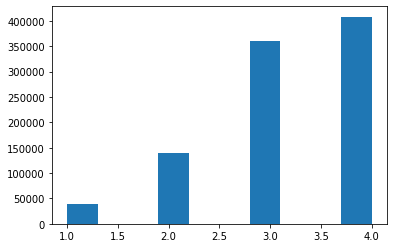

In [378]:
plt.hist(df.fico_bucket)
plt.xticks()
plt.show()

In [379]:
df.covid_flag.fillna('N', inplace=True)
df.cd_servicer.fillna('UNKNOWN', inplace=True)
df.cd_mstr_servicer.fillna('unknown', inplace=True)
df.doc_type.fillna('Other', inplace=True)
df.dropna(subset = ['cltv'], inplace=True)
df.fico_bucket.fillna(np.floor(df['fico_bucket'].mean()),  inplace = True)


In [380]:
df['mtl'].unique()

array([ 1.,  0.,  7.,  2., 15., 12.,  9.,  8.,  5.,  3., 13., 14., 10.,
        4., 18., nan, 17.,  6., 11., 28., 33., 21., 47., 16., 22., 27.,
       20., 38., 19., 32., 26., 24., 23., 25., 30.])

In [381]:
df['mtl']=df['mtl'].fillna(df['mtl'].mean())
df['deal_cpn']=df['deal_cpn'].fillna(df['deal_cpn'].mean())

In [385]:
df.isnull().any()

eb                          False
close_bal                   False
wala                        False
mtl                         False
issuer                      False
svcr                        False
init_rate                   False
mba_prev                     True
mba_prev2                    True
inv_bal_p1                   True
inv_bal_p2                   True
ltv                         False
cltv                        False
fico_bucket                 False
geo                         False
occ_bucket                  False
purp_bucket                 False
doc_type                    False
covid_flag                  False
cd_servicer                 False
cd_mstr_servicer            False
deal_cpn                    False
is_prepay                   False
factor_month                False
close_month                 False
month_mod                   False
has_been_mod                False
factor_month_is_janordec    False
dtype: bool

In [402]:
#df = df.dropna(subset=[])
df = df.fillna(method='bfill')
df.isnull().any()

eb                          False
close_bal                   False
wala                        False
mtl                         False
issuer                      False
svcr                        False
init_rate                   False
mba_prev                    False
mba_prev2                   False
inv_bal_p1                  False
inv_bal_p2                  False
ltv                         False
cltv                        False
fico_bucket                 False
geo                         False
occ_bucket                  False
purp_bucket                 False
doc_type                    False
covid_flag                  False
cd_servicer                 False
cd_mstr_servicer            False
deal_cpn                    False
is_prepay                   False
factor_month                False
close_month                 False
month_mod                   False
has_been_mod                False
factor_month_is_janordec    False
dtype: bool

In [403]:
df.shape

(985278, 28)

issuer


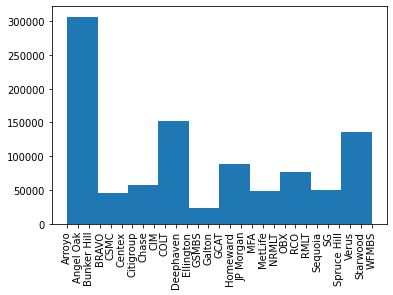

svcr


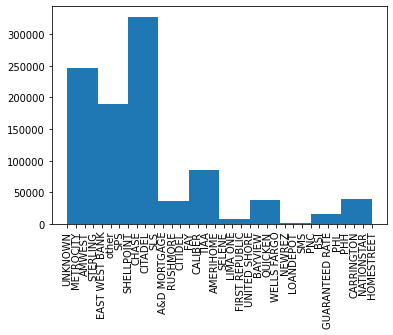

mba_prev


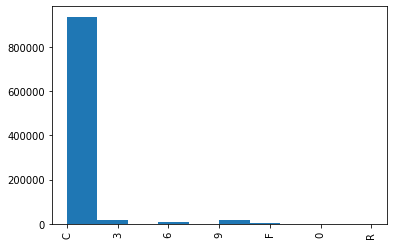

mba_prev2


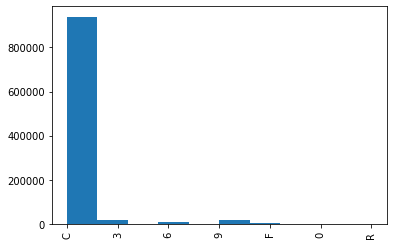

occ_bucket


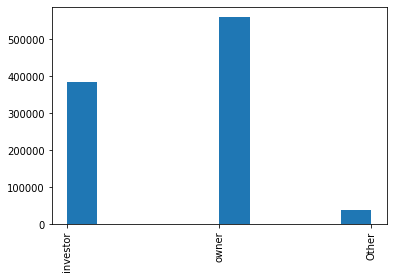

purp_bucket


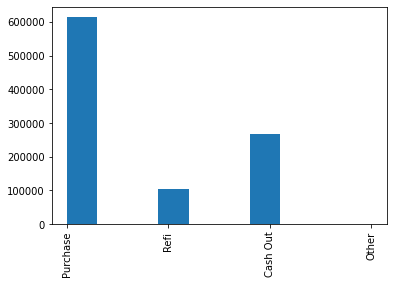

doc_type


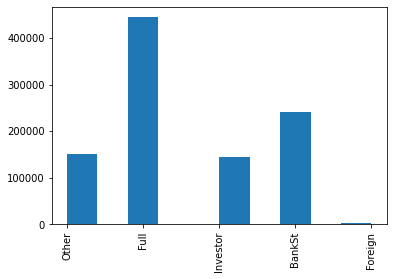

geo


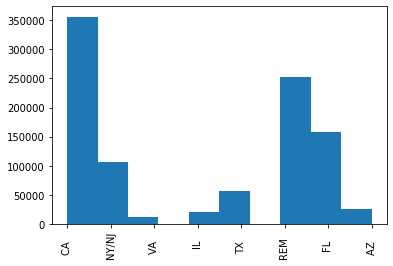

cd_servicer


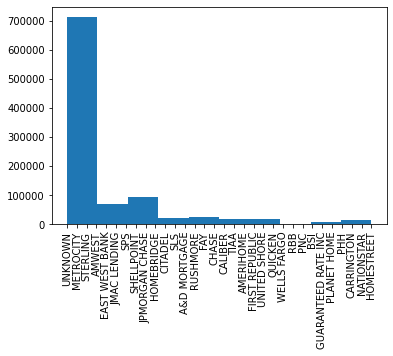

cd_mstr_servicer


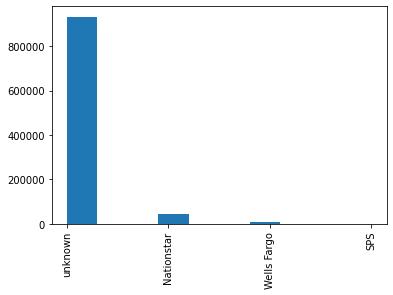

covid_flag


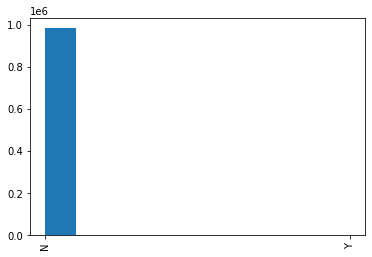

In [404]:
nominal_variables = ['issuer', 'svcr', 'mba_prev', 'mba_prev2', 'occ_bucket', 'purp_bucket', 'doc_type', 
                     'geo', 'cd_servicer', 'cd_mstr_servicer', 'covid_flag']

for i in nominal_variables:
    print(i)
    plt.hist(df[i])
    plt.xticks(rotation = 90)
    plt.show()

In [405]:
df.reset_index(drop = True, inplace=True)

In [406]:
df.head()

,eb,close_bal,wala,mtl,issuer,svcr,init_rate,mba_prev,mba_prev2,inv_bal_p1,inv_bal_p2,ltv,cltv,fico_bucket,geo,occ_bucket,purp_bucket,doc_type,covid_flag,cd_servicer,cd_mstr_servicer,deal_cpn,is_prepay,factor_month,close_month,month_mod,has_been_mod,factor_month_is_janordec
0,611100.02,613218.72,7,1.0,Arroyo,UNKNOWN,5.375,C,C,611809.05,613218.72,70.0,65.921729,3.0,CA,investor,Purchase,Other,N,UNKNOWN,unknown,5.27773,0,7,5,0,0,0
1,609543.95,613218.72,8,1.0,Arroyo,UNKNOWN,5.375,C,C,610259.91,611809.05,70.0,65.710023,3.0,CA,investor,Purchase,Other,N,UNKNOWN,unknown,5.27773,0,8,5,0,0,0
2,608827.17,613218.72,9,1.0,Arroyo,UNKNOWN,5.375,C,C,609546.33,610259.91,70.0,65.519354,3.0,CA,investor,Purchase,Other,N,UNKNOWN,unknown,5.27773,0,9,5,0,0,0
3,607260.91,613218.72,10,1.0,Arroyo,UNKNOWN,5.375,C,C,607987.05,609546.33,70.0,65.329890,3.0,CA,investor,Purchase,Other,N,UNKNOWN,unknown,5.27773,0,10,5,0,0,0
4,605691.42,613218.72,11,1.0,Arroyo,UNKNOWN,5.375,C,C,606424.56,607987.05,70.0,65.123821,3.0,CA,investor,Purchase,Other,N,UNKNOWN,unknown,5.27773,0,11,5,0,0,0


In [407]:
y = df[y_var]
X = df.drop(y_var, axis = 1)
X.reset_index(drop=True, inplace=True)

In [408]:
from sklearn.preprocessing import OneHotEncoder
import targetencoding

# For unique counts < 5, do one-hot-encoding; otherwise, use target encoding

nominal_below5 = [i for i in nominal_variables if len(X[i].unique()) <= 5]

onehotenc = OneHotEncoder()

onehotencoded_df = pd.DataFrame(onehotenc.fit_transform(X[nominal_below5]).toarray())
onehotencoded_df.columns = onehotenc.get_feature_names(nominal_below5)

X = X.join(onehotencoded_df)
X.drop(nominal_below5, axis = 1, inplace=True)

X.head()


,eb,close_bal,wala,mtl,issuer,svcr,init_rate,mba_prev,mba_prev2,inv_bal_p1,inv_bal_p2,ltv,cltv,fico_bucket,geo,cd_servicer,deal_cpn,factor_month,close_month,month_mod,has_been_mod,factor_month_is_janordec,occ_bucket_Other,occ_bucket_investor,occ_bucket_owner,purp_bucket_Cash Out,purp_bucket_Other,purp_bucket_Purchase,purp_bucket_Refi,doc_type_BankSt,doc_type_Foreign,doc_type_Full,doc_type_Investor,doc_type_Other,cd_mstr_servicer_Nationstar,cd_mstr_servicer_SPS,cd_mstr_servicer_Wells Fargo,cd_mstr_servicer_unknown,covid_flag_N,covid_flag_Y
0,611100.02,613218.72,7,1.0,Arroyo,UNKNOWN,5.375,C,C,611809.05,613218.72,70.0,65.921729,3.0,CA,UNKNOWN,5.27773,7,5,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,609543.95,613218.72,8,1.0,Arroyo,UNKNOWN,5.375,C,C,610259.91,611809.05,70.0,65.710023,3.0,CA,UNKNOWN,5.27773,8,5,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,608827.17,613218.72,9,1.0,Arroyo,UNKNOWN,5.375,C,C,609546.33,610259.91,70.0,65.519354,3.0,CA,UNKNOWN,5.27773,9,5,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,607260.91,613218.72,10,1.0,Arroyo,UNKNOWN,5.375,C,C,607987.05,609546.33,70.0,65.329890,3.0,CA,UNKNOWN,5.27773,10,5,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,605691.42,613218.72,11,1.0,Arroyo,UNKNOWN,5.375,C,C,606424.56,607987.05,70.0,65.123821,3.0,CA,UNKNOWN,5.27773,11,5,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [409]:
nominal_else = [i for i in nominal_variables if i not in nominal_below5]
encoder  = targetencoding.TargetEncoder(cols = nominal_else)
X = encoder.fit(X, y).transform(X)
X.head()

,eb,close_bal,wala,mtl,issuer,svcr,init_rate,mba_prev,mba_prev2,inv_bal_p1,inv_bal_p2,ltv,cltv,fico_bucket,geo,cd_servicer,deal_cpn,factor_month,close_month,month_mod,has_been_mod,factor_month_is_janordec,occ_bucket_Other,occ_bucket_investor,occ_bucket_owner,purp_bucket_Cash Out,purp_bucket_Other,purp_bucket_Purchase,purp_bucket_Refi,doc_type_BankSt,doc_type_Foreign,doc_type_Full,doc_type_Investor,doc_type_Other,cd_mstr_servicer_Nationstar,cd_mstr_servicer_SPS,cd_mstr_servicer_Wells Fargo,cd_mstr_servicer_unknown,covid_flag_N,covid_flag_Y
0,611100.02,613218.72,7,1.0,0.018486,0.019056,5.375,0.026251,0.026289,611809.05,613218.72,70.0,65.921729,3.0,0.028287,0.024338,5.27773,7,5,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,609543.95,613218.72,8,1.0,0.018486,0.019056,5.375,0.026251,0.026289,610259.91,611809.05,70.0,65.710023,3.0,0.028287,0.024338,5.27773,8,5,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,608827.17,613218.72,9,1.0,0.018486,0.019056,5.375,0.026251,0.026289,609546.33,610259.91,70.0,65.519354,3.0,0.028287,0.024338,5.27773,9,5,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,607260.91,613218.72,10,1.0,0.018486,0.019056,5.375,0.026251,0.026289,607987.05,609546.33,70.0,65.329890,3.0,0.028287,0.024338,5.27773,10,5,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,605691.42,613218.72,11,1.0,0.018486,0.019056,5.375,0.026251,0.026289,606424.56,607987.05,70.0,65.123821,3.0,0.028287,0.024338,5.27773,11,5,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [411]:
# If df contains only numerical values
X.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

eb                              True
close_bal                       True
wala                            True
mtl                             True
issuer                          True
svcr                            True
init_rate                       True
mba_prev                        True
mba_prev2                       True
inv_bal_p1                      True
inv_bal_p2                      True
ltv                             True
cltv                            True
fico_bucket                     True
geo                             True
cd_servicer                     True
deal_cpn                        True
factor_month                    True
close_month                     True
month_mod                       True
has_been_mod                    True
factor_month_is_janordec        True
occ_bucket_Other                True
occ_bucket_investor             True
occ_bucket_owner                True
purp_bucket_Cash Out            True
purp_bucket_Other               True
p

<AxesSubplot:>

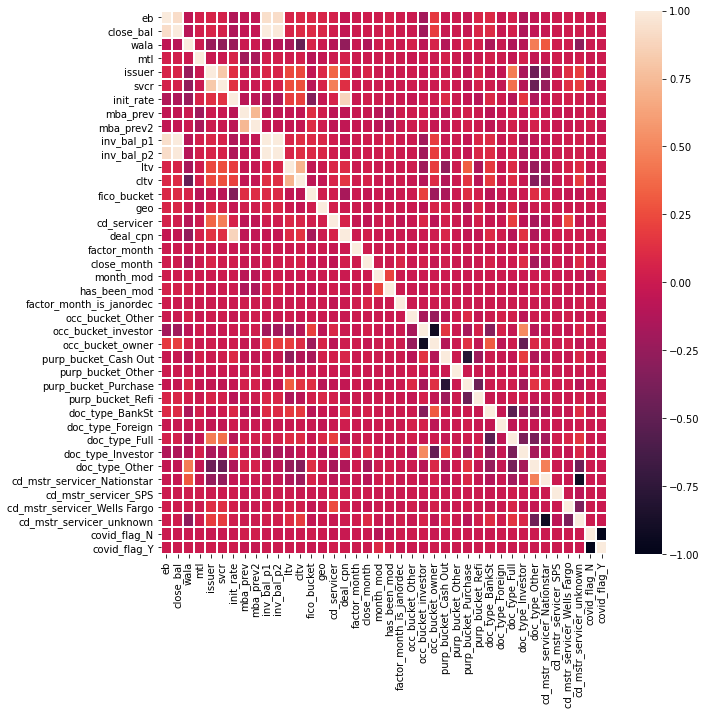

In [412]:
corr = X.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr, linewidths=.3)

In [413]:
# Remove high correlated columns
X.drop(['eb','purp_bucket_Other', 'close_bal', 'occ_bucket_owner', 'cd_mstr_servicer_unknown', 'svcr', 'purp_bucket_Purchase', 'covid_flag_N'], axis = 1, inplace=True)

# Drop cltv
X.drop('cltv', axis = 1, inplace = True)

<AxesSubplot:>

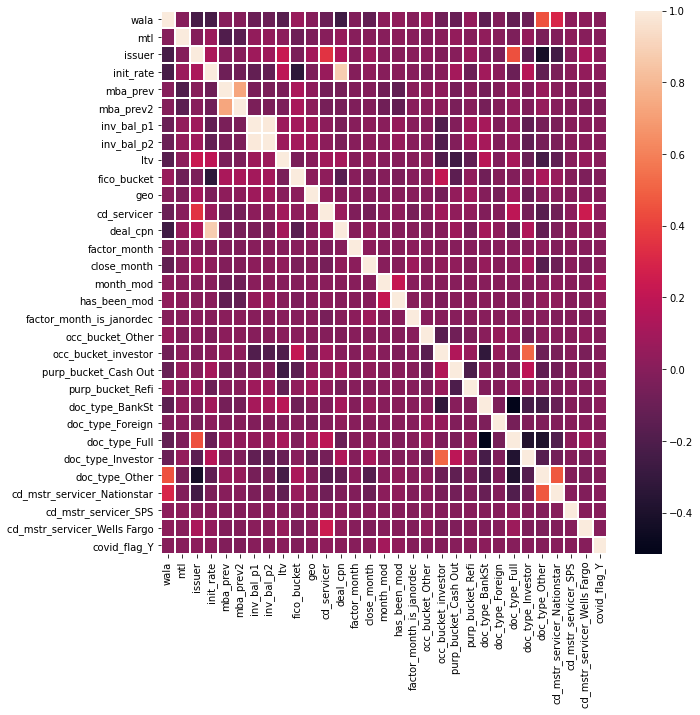

In [414]:
corr = X.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr, linewidths=.3)

<AxesSubplot:>

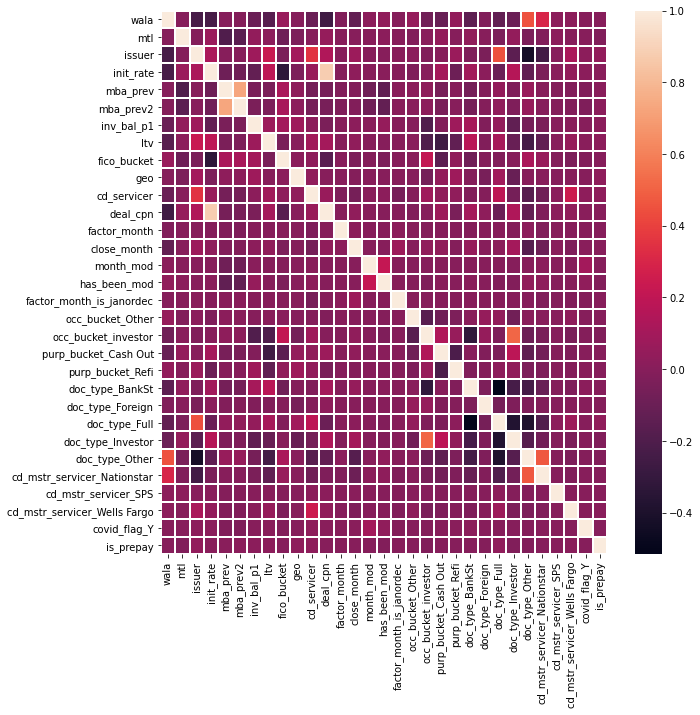

In [415]:
X.drop('inv_bal_p2', axis=1, inplace= True)
X_ = X.copy()
X_[y_var] = y

corr = X_.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr, linewidths=.3)

Random shuffle and split the dataset into train, val, test

In [420]:
df_cleaned = X.copy()
df_cleaned[y_var] = y
df_cleaned = df_cleaned.sample(frac = 1).reset_index(drop = True)
train, val, test = np.array_split(df_cleaned, 3)
X_train = train.drop(y_var, axis = 1)
X_test = test.drop(y_var, axis = 1)
X_val = val.drop(y_var, axis = 1)
y_train = train[y_var]
y_test = test[y_var]
y_val = val[y_var]

In [421]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((328426, 30), (328426, 30), (328426, 30), (328426,), (328426,), (328426,))

In [422]:
df_train = X_train.join(y_train).sample(frac=1).reset_index(drop=True)
df_test = X_test.join(y_test).sample(frac=1).reset_index(drop=True)
df_val = X_val.join(y_val).sample(frac=1).reset_index(drop=True)

In [423]:
import pickle
pickle.dump(df_train, open( "prepay_train.pkl", "wb" ) )
pickle.dump(df_test, open( "prepay_test.pkl", "wb" ) )
pickle.dump(df_val, open( "prepay_val.pkl", "wb" ) )

In [23]:
import pickle
y_var = 'is_prepay'
df_train = pickle.load( open( "prepay_train.pkl", "rb" ) )
y_train = df_train[y_var]
X_train = df_train.drop(y_var, axis = 1)

df_val = pickle.load( open( "prepay_val.pkl", "rb" ) )
y_val = df_val[y_var]
X_val = df_val.drop(y_var, axis = 1)

df_test = pickle.load( open( "prepay_test.pkl", "rb" ) )
y_test = df_test[y_var]
X_test = df_test.drop(y_var, axis = 1)

### Start with doc_type, fico, wala, cltv and some basic un-tuned models

In [24]:
# LR with doc_type
doc_Type = [i for i in X_train.columns if 'doc' in i]
lr_doc = LogisticRegression()
lr_doc.fit(X_train[doc_Type], y_train)
print('lr_doc: ',  lr_doc.score(X_test[doc_Type], y_test))

lr_fico = LogisticRegression()
lr_fico.fit(np.reshape(X_train['fico_bucket'].values,(-1,1)), y_train)
print('lr_fico: ',  lr_fico.score(np.reshape(X_test['fico_bucket'].values,(-1,1)), y_test))

lr_wala = LogisticRegression()
lr_wala.fit(np.reshape(X_train['wala'].values,(-1,1)), y_train)
print('lr_wala: ',  lr_wala.score(np.reshape(X_test['wala'].values,(-1,1)), y_test))

lr_ltv = LogisticRegression()
lr_ltv.fit(np.reshape(X_train['ltv'].values,(-1,1)), y_train)
print('lr_ltv: ',  lr_ltv.score(np.reshape(X_test['ltv'].values,(-1,1)), y_test))

lr_doc:  0.9738784383696784
lr_fico:  0.9738784383696784
lr_wala:  0.9738784383696784
lr_ltv:  0.9738784383696784


Clearly, it is overfitting.

doc_type


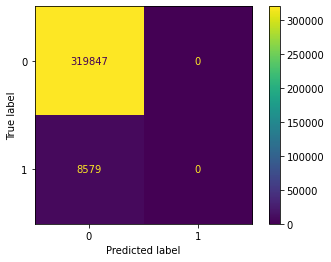

fico_bucket


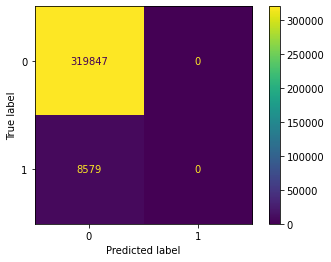

wala


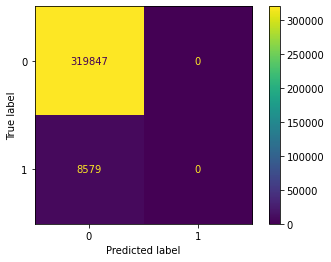

ltv


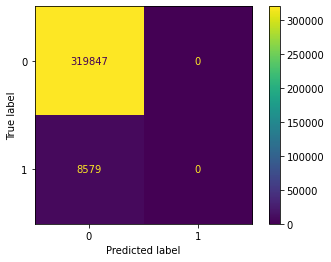

In [469]:
orig_features = [lr_doc,lr_fico, lr_wala,lr_ltv]
orig_names = ['doc_type', 'fico_bucket', 'wala', 'ltv']
for i in zip(orig_features, orig_names):
    
    if i[1] == 'doc_type':
        print(i[1])
        plot_confusion_matrix(i[0], X_test[doc_Type], y_test)
        plt.show()
    else:
        print(i[1])
        plot_confusion_matrix(i[0], np.reshape(X_test[i[1]].values,(-1,1)), y_test)
        plt.show()

Use SMOTE-TOMEK to resample the training data

In [25]:
# Resample a fraction of the training set to get a 1:0 ratio of 1/4
from imblearn.combine import SMOTETomek
from collections import Counter

df_train_frac = df_train.sample(frac=0.2)
X_train_frac = df_train_frac.drop(y_var, axis = 1)
y_train_frac = df_train_frac[y_var]
counter = Counter(y_train_frac)
print('Before', counter)
smtom = SMOTETomek(sampling_strategy=0.25, random_state = 8, n_jobs=-1)
X_train_smtom_frac, y_train_smtom_frac = smtom.fit_resample(X_train_frac, y_train_frac)
counter = Counter(y_train_smtom_frac)
print("After", counter)

Before Counter({0: 64011, 1: 1674})
After Counter({0: 59464, 1: 11455})


In [725]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=0.5)
X_train_frac_under, y_train_frac_under = undersample.fit_resample(X_train_frac,y_train_frac)

In [35]:
doc_Type = [i for i in X_train.columns if 'doc' in i]
lr_doc = LogisticRegression(class_weight='balanced')
lr_doc.fit(X_train_smtom_frac[doc_Type], y_train_smtom_frac)
print('lr_doc: ',  lr_doc.score(X_test[doc_Type], y_test))

lr_fico = LogisticRegression(class_weight='balanced')
lr_fico.fit(np.reshape(X_train_smtom_frac['fico_bucket'].values,(-1,1)), y_train_smtom_frac)
print('lr_fico: ',  lr_fico.score(np.reshape(X_test['fico_bucket'].values,(-1,1)), y_test))

lr_wala = LogisticRegression(class_weight='balanced')
lr_wala.fit(np.reshape(X_train_smtom_frac['wala'].values,(-1,1)), y_train_smtom_frac)
print('lr_wala: ',  lr_wala.score(np.reshape(X_test['wala'].values,(-1,1)), y_test))

lr_ltv = LogisticRegression(class_weight='balanced')
lr_ltv.fit(np.reshape(X_train_smtom_frac['ltv'].values,(-1,1)), y_train_smtom_frac)
print('lr_ltv: ',  lr_ltv.score(np.reshape(X_test['ltv'].values,(-1,1)), y_test))

lr_doc:  0.5516219787714737
lr_fico:  0.40678265423565735
lr_wala:  0.33824666743802256
lr_ltv:  0.43027044143886295


In [36]:
for i in zip(doc_Type, lr_doc.coef_[0]):
    print(i[0], i[1])

doc_type_BankSt 0.2633940011570649
doc_type_Foreign -0.923317465010904
doc_type_Full 0.5150517380435218
doc_type_Investor -0.15459321615171817
doc_type_Other 0.008064429904349146


In [37]:
lr_doc.intercept_

array([-0.29656313])

In [38]:
p = np.exp(lr_doc.intercept_[0]) / (np.exp(lr_doc.intercept_[0]) + 1)
p

0.4263978694435707

In [39]:
np.bincount(y_train_smtom_frac)[1]/np.bincount(y_train_smtom_frac)[0]

0.19263756222252118

In [34]:
lr_doc.predict_proba(X_test[doc_Type])

array([[0.59629923, 0.40370077],
       [0.50110431, 0.49889569],
       [0.45289875, 0.54710125],
       ...,
       [0.45289875, 0.54710125],
       [0.50110431, 0.49889569],
       [0.50110431, 0.49889569]])

doc_type


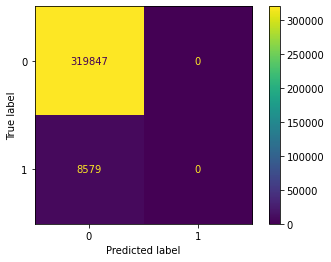

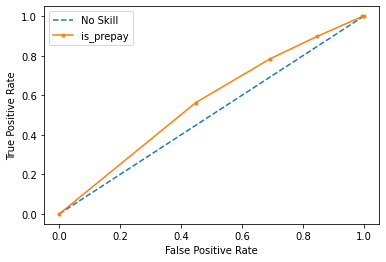

is_prepay AUC score:  0.5660095189694587

fico_bucket


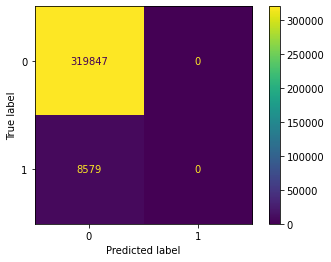

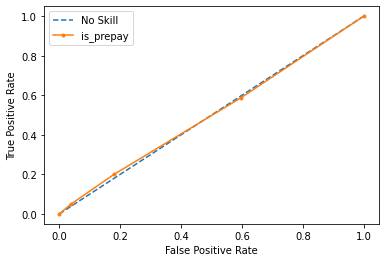

is_prepay AUC score:  0.5028616369359193

wala


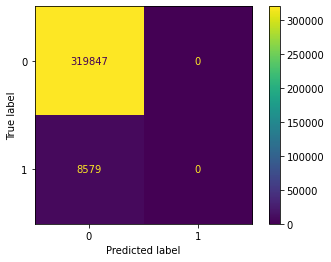

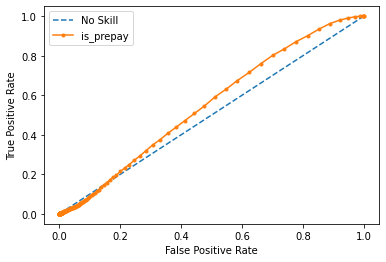

is_prepay AUC score:  0.5524494200689692

ltv


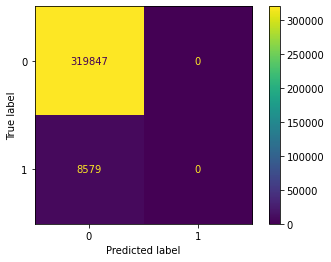

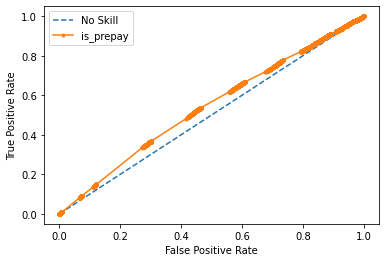

is_prepay AUC score:  0.5411014319870133



In [640]:
orig_features = [lr_doc,lr_fico, lr_wala,lr_ltv]
orig_names = ['doc_type', 'fico_bucket', 'wala', 'ltv']
for i in zip(orig_features, orig_names):
    
    if i[1] == 'doc_type':
        print(i[1])
        plot_confusion_matrix(i[0], X_test[doc_Type], y_test)
        plt.show()
        plot_roc(i[0], X_test[doc_Type], y_test, y_var)
        plt.show()
        print()
    else:
        print(i[1])
        plot_confusion_matrix(i[0], np.reshape(X_test[i[1]].values,(-1,1)), y_test)
        plt.show()
        plot_roc(i[0], np.reshape(X_test[i[1]].values,(-1,1)), y_test,y_var)
        plt.show()
        print()

In [731]:
yhat = lr_doc.predict_proba(X_test[doc_Type])
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, model_probs)
auc_score = auc(recall, precision)
print('RF PR AUC: %.3f' % auc_score)

RF PR AUC: 0.304


Combine four features

In [13]:
# Get columns
orig_names.extend(doc_Type)
orig_names.remove('doc_type')

NameError: name 'orig_names' is not defined

In [12]:
lr_orig = LogisticRegression()
lr_orig.fit(X_train_smtom_frac[orig_names], y_train_smtom_frac)
lr_orig.score(X_test[orig_names], y_test)

NameError: name 'orig_names' is not defined

In [11]:
lr_orig.coef_

NameError: name 'lr_orig' is not defined

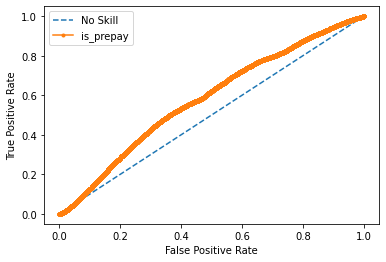

is_prepay AUC score:  0.5824960629734709


In [645]:
plot_roc(lr_orig,X_test[orig_names], y_test, y_var)

RF PR AUC: 0.032


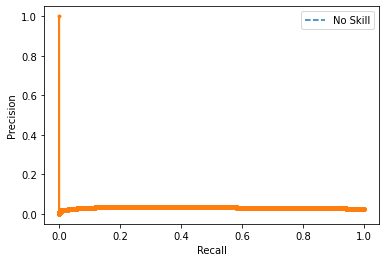

In [646]:
yhat = lr_orig.predict_proba(X_test[orig_names])
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, model_probs)
auc_score = auc(recall, precision)
print('RF PR AUC: %.3f' % auc_score)
plot_pr_curve(y_test, model_probs)

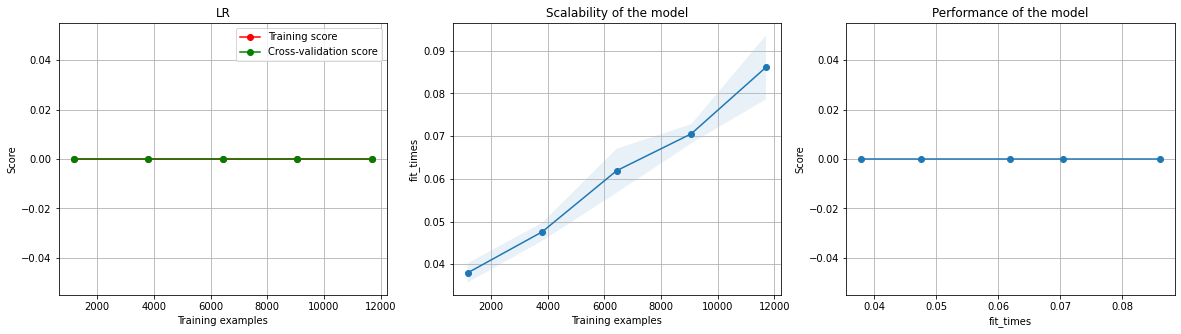

In [699]:
plot_learning_curve2(LogisticRegression(), 'LR', X_train_smtom_frac[orig_names].iloc[:len(X_train_smtom_frac)//5], y_train_smtom_frac.iloc[:len(y_train_smtom_frac)//5], scoring = 'recall')
plt.show()

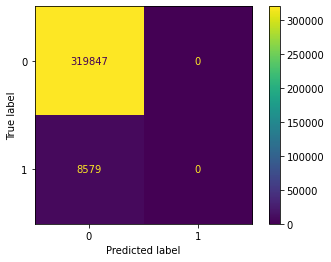

In [656]:
plot_confusion_matrix(lr_orig, X_test[orig_names], y_test)

Above we got a slightly better AUC score, but still no precision.

Random Forest

In [669]:
rf_orig = RandomForestClassifier()
rf_orig.fit(X_train_smtom_frac[orig_names], y_train_smtom_frac)
rf_orig.score(X_test[orig_names], y_test)

0.9596986840262343

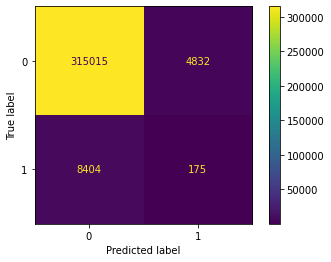

In [670]:
plot_confusion_matrix(rf_orig, X_test[orig_names], y_test)

In [671]:
cross_val_score(RandomForestClassifier(), X_train_smtom_frac[orig_names], y_train_smtom_frac, cv = 8, scoring='recall').mean()

0.8257786112028722

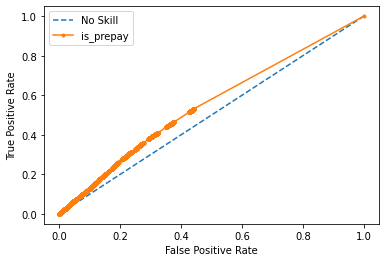

is_prepay AUC score:  0.5516636388713556


In [672]:
plot_roc(rf_orig,X_test[orig_names], y_test, y_var)

In [673]:
def plot_pr_curve(test_y, model_probs):
    # calculate the no skill line as the proportion of the positive class
    no_skill = len(test_y[test_y==1]) / len(test_y)
    # plot the no skill precision-recall curve
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    # plot model precision-recall curve
    precision, recall, _ = precision_recall_curve(test_y, model_probs)
    plt.plot(recall, precision, marker='.')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

RF PR AUC: 0.031


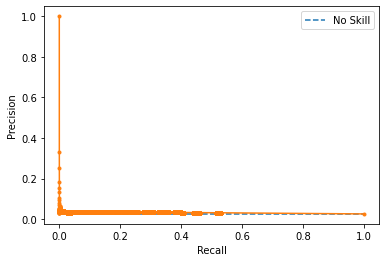

In [674]:
yhat = rf_orig.predict_proba(X_test[orig_names])
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, model_probs)
auc_score = auc(recall, precision)
print('RF PR AUC: %.3f' % auc_score)
plot_pr_curve(y_test, model_probs)

The following rf model performs well, but that could be because the resample method is the same, causing information leakage.

<module 'matplotlib.pyplot' from 'c:\\users\\scui\\appdata\\local\\programs\\python\\python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

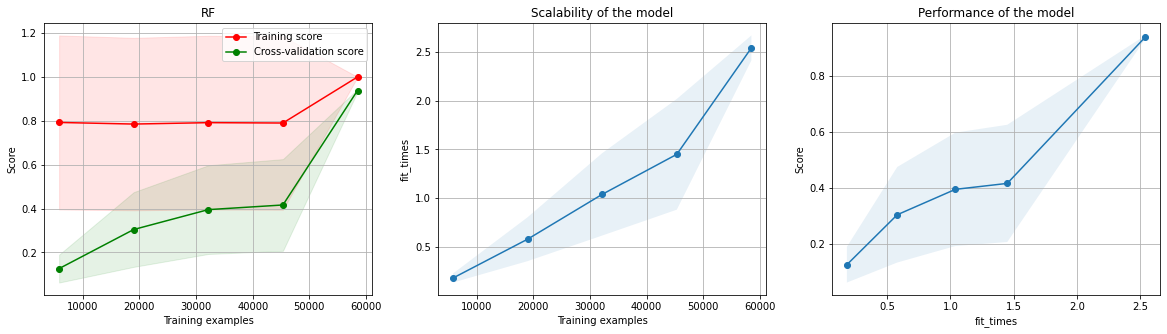

In [675]:
plot_learning_curve2(RandomForestClassifier(), 'RF', X_train_smtom_frac[orig_names], y_train_smtom_frac, scoring = 'precision')

### Add other columns 

In [595]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9737505556807318

Very bad recall, imbalanced data

In [599]:
print(cross_val_score(RandomForestClassifier(), X_train, y_train, cv=10, scoring = 'recall'))

[0.0260355  0.03664303 0.02600473 0.02245863 0.0248227  0.03427896
 0.02721893 0.02721893 0.02366864 0.03431953]


In [600]:
X_train.head()

,wala,mtl,issuer,init_rate,mba_prev,mba_prev2,inv_bal_p1,ltv,fico_bucket,geo,cd_servicer,deal_cpn,factor_month,close_month,month_mod,has_been_mod,factor_month_is_janordec,occ_bucket_Other,occ_bucket_investor,purp_bucket_Cash Out,purp_bucket_Refi,doc_type_BankSt,doc_type_Foreign,doc_type_Full,doc_type_Investor,doc_type_Other,cd_mstr_servicer_Nationstar,cd_mstr_servicer_SPS,cd_mstr_servicer_Wells Fargo,covid_flag_Y
0,51,1.175411,0.025076,8.625,0.026251,0.026289,124673.71,70.00,1.0,0.021609,0.024338,5.594596,7,2,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,71,1.175411,0.018486,3.875,0.026251,0.026289,269350.58,41.10,3.0,0.028287,0.012605,5.347266,3,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,70,1.000000,0.018486,5.250,0.026251,0.026289,94622.48,60.00,3.0,0.028035,0.024338,5.277730,11,5,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,16,1.000000,0.021519,5.500,0.026251,0.026289,94074.81,64.98,4.0,0.028035,0.018911,5.851862,8,9,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18,1.000000,0.027060,4.750,0.026251,0.026289,517499.95,90.00,4.0,0.028035,0.024338,6.568932,1,8,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


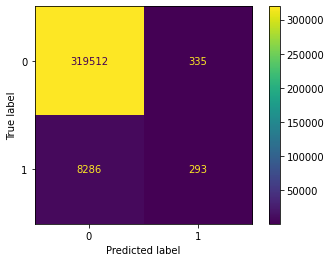

In [601]:
plot_confusion_matrix(rf, X_test, y_test)

Select important features that are >0.0001

In [602]:
importance = [round_sig(i) for i in rf.feature_importances_]
feature_importance = list(zip(X_train.columns,importance))
sorted(feature_importance, key = lambda x: x[1])

[('month_mod', 1.81e-05),
 ('covid_flag_Y', 7.39e-05),
 ('cd_mstr_servicer_SPS', 7.45e-05),
 ('doc_type_Foreign', 0.000189),
 ('has_been_mod', 0.000818),
 ('cd_mstr_servicer_Wells Fargo', 0.000889),
 ('doc_type_Other', 0.00154),
 ('cd_mstr_servicer_Nationstar', 0.00177),
 ('doc_type_Investor', 0.00204),
 ('mba_prev', 0.00394),
 ('mba_prev2', 0.00415),
 ('doc_type_Full', 0.00454),
 ('doc_type_BankSt', 0.00456),
 ('occ_bucket_Other', 0.00565),
 ('occ_bucket_investor', 0.00829),
 ('purp_bucket_Refi', 0.00958),
 ('factor_month_is_janordec', 0.0133),
 ('purp_bucket_Cash Out', 0.0147),
 ('cd_servicer', 0.0229),
 ('fico_bucket', 0.0317),
 ('issuer', 0.0362),
 ('close_month', 0.0408),
 ('geo', 0.0419),
 ('mtl', 0.0442),
 ('deal_cpn', 0.0621),
 ('ltv', 0.0967),
 ('factor_month', 0.0979),
 ('init_rate', 0.101),
 ('wala', 0.146),
 ('inv_bal_p1', 0.202)]

In [735]:
important_features = [i[0] for i in feature_importance if i[1] >= 0.0001]
X_train, X_test = X_train[important_features], X_test[important_features]
X_train_frac = X_train_frac[important_features]
X_train_smtom_frac = X_train_smtom_frac[important_features]

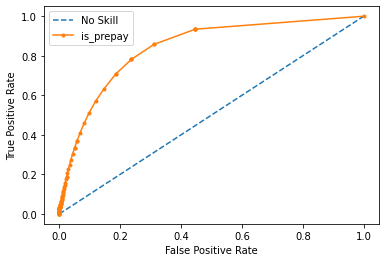

is_prepay AUC score:  0.8397024019249897


In [603]:
plot_roc(rf,X_test, y_test, y_var)

<module 'matplotlib.pyplot' from 'c:\\users\\scui\\appdata\\local\\programs\\python\\python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

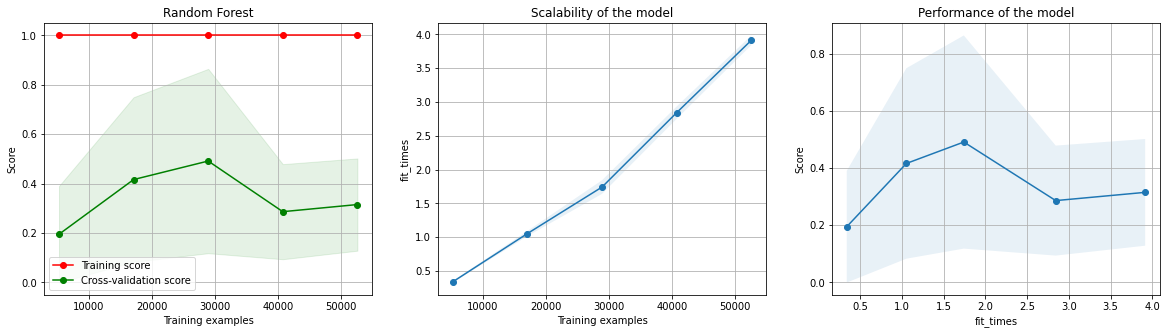

In [676]:
plot_learning_curve2(RandomForestClassifier(), 'Random Forest', X_train_frac, y_train_frac, scoring = 'precision')

Again, pretty bad. Although roc is better, the precision still doesn't improve when training size increases.

In [707]:
rf_resample = RandomForestClassifier()
rf_resample.fit(X_train_smtom_frac, y_train_smtom_frac)

RandomForestClassifier()

RF PR AUC: 0.088


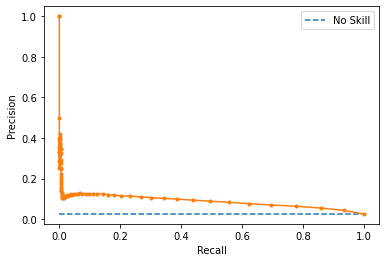

In [708]:
yhat = rf_resample.predict_proba(X_test)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, model_probs)
auc_score = auc(recall, precision)
print('RF PR AUC: %.3f' % auc_score)
plot_pr_curve(y_test, model_probs)

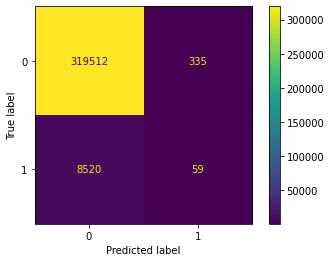

In [713]:
plot_confusion_matrix(rf_resample, X_test, y_test)

In [709]:
rf_balanced = RandomForestClassifier(class_weight='balanced')
rf_balanced.fit(X_train_frac, y_train_frac)

RandomForestClassifier(class_weight='balanced')

RF PR AUC: 0.096


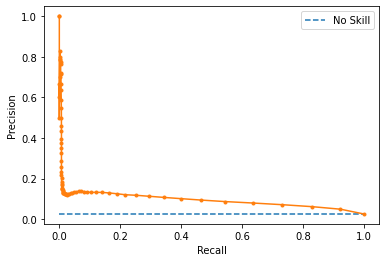

In [710]:
yhat = rf_balanced.predict_proba(X_test)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, model_probs)
auc_score = auc(recall, precision)
print('RF PR AUC: %.3f' % auc_score)
plot_pr_curve(y_test, model_probs)

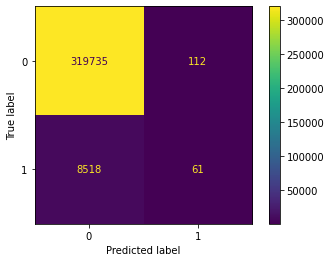

In [714]:
plot_confusion_matrix(rf_balanced, X_test, y_test)

In [736]:
rf_balanced_resample = RandomForestClassifier(class_weight='balanced')
rf_balanced_resample.fit(X_train_smtom_frac, y_train_smtom_frac)

RandomForestClassifier(class_weight='balanced')

RF PR AUC: 0.092


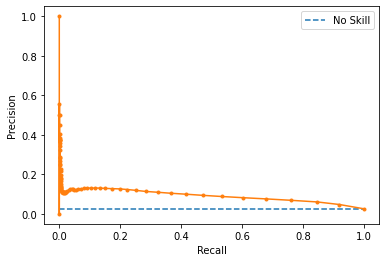

In [737]:
yhat = rf_balanced_resample.predict_proba(X_test)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, model_probs)
auc_score = auc(recall, precision)
print('RF PR AUC: %.3f' % auc_score)
plot_pr_curve(y_test, model_probs)

It seems like smote-tomek resampling doesn't improve the model performance.

In [715]:
# TODO: Find optimal threshold 

XGBoost

In [762]:
xgb0 = xgb.XGBClassifier(scale_pos_weight = 5)
xgb0.fit(X_train_smtom_frac, y_train_smtom_frac)
xgb0.score(X_test, y_test)

[17:25:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.966921011125794

In [760]:
y_train_smtom_frac.sum()/len(y_train_smtom_frac)

0.1607713405151695

RF PR AUC: 0.110


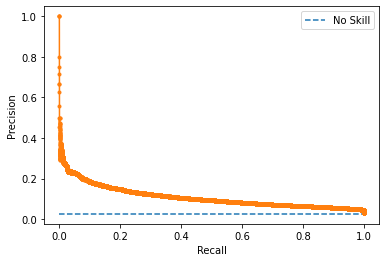

In [759]:
yhat = xgb0.predict_proba(X_test)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, model_probs)
auc_score = auc(recall, precision)
print('RF PR AUC: %.3f' % auc_score)
plot_pr_curve(y_test, model_probs)

In [778]:
xgb_cv = xgb.XGBClassifier()
xgb_params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'scale_pos_weight': [np.sqrt(len(y_train)/y_train.sum()), len(y_train)/y_train.sum()]
        }
folds = 6
param_comb = 6
random_search_xgb = RandomizedSearchCV(xgb_cv, param_distributions = xgb_params, scoring='precision', 
                                       n_jobs=-1, cv=folds, verbose=3, random_state=1001 ).fit(X_train,y_train)
random_search_xgb.best_params_

Fitting 6 folds for each of 10 candidates, totalling 60 fits
[17:50:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'subsample': 1.0,
 'scale_pos_weight': 6.232495297594357,
 'min_child_weight': 5,
 'max_depth': 3,
 'gamma': 0.5,
 'colsample_bytree': 1.0}

In [785]:
xgb_tuned = xgb.XGBClassifier(subsample= 1.0, scale_pos_weight=np.sqrt(len(y_train)/y_train.sum()),min_child_weight= 5,max_depth= 3,gamma= 0.5,colsample_bytree= 1.0)
xgb_tuned.fit(X_train, y_train)
xgb_tuned.score(X_test, y_test)

[17:56:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9656056463251996

RF PR AUC: 0.157


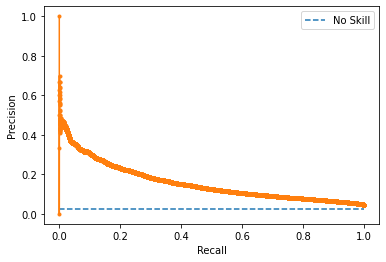

In [786]:
yhat = xgb_tuned.predict_proba(X_test)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, model_probs)
auc_score = auc(recall, precision)
print('RF PR AUC: %.3f' % auc_score)
plot_pr_curve(y_test, model_probs)

<module 'matplotlib.pyplot' from 'c:\\users\\scui\\appdata\\local\\programs\\python\\python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

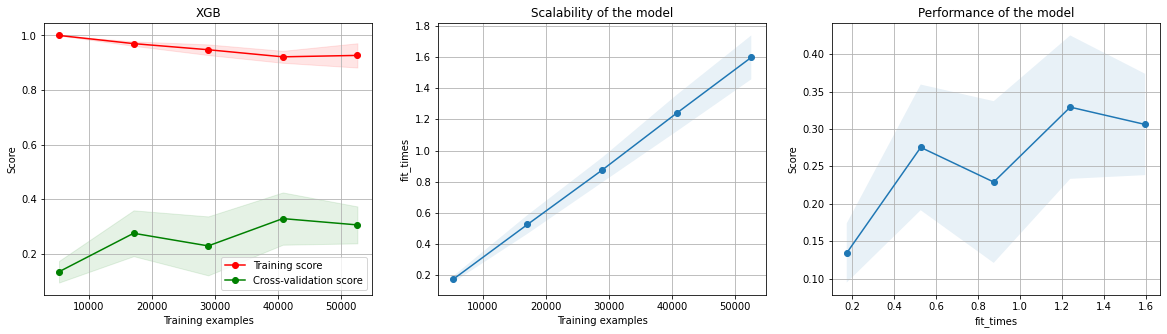

In [756]:
plot_learning_curve2(xgb.XGBClassifier(subsample= 0.8, min_child_weight= 5, max_depth= 5,gamma= 1,colsample_bytree= 0.8, eval_metric='mlogloss'), 'XGB', X_train_frac, y_train_frac, scoring = 'precision')

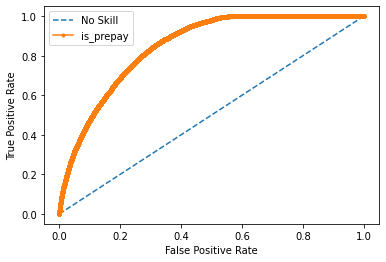

is_prepay AUC score:  0.8483524525369427


In [782]:
plot_roc(xgb_tuned,X_test, y_test, y_var)

In [787]:
xgb_tuned_resample = xgb.XGBClassifier(scale_pos_weight = np.sqrt(len(y_train)/y_train.sum()))
xgb_tuned_resample.fit(X_train, y_train)
xgb_tuned_resample.score(X_test, y_test)

[17:57:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9622502481533131

RF PR AUC: 0.172


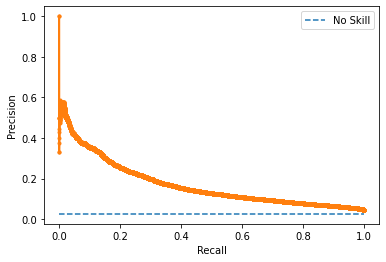

In [788]:
yhat = xgb_tuned_resample.predict_proba(X_test)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, model_probs)
auc_score = auc(recall, precision)
print('RF PR AUC: %.3f' % auc_score)
plot_pr_curve(y_test, model_probs)

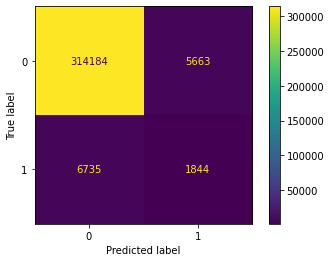

In [777]:
plot_confusion_matrix(xgb_tuned_resample, X_test, y_test)

There are other ML models, SVM, NB, KNN, other boosting algorithms, GBM, LGBM etc., but in theory they will not outperform XGB.

### Deep Learning Method

In [9]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


In [ ]:
from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig

data_config = DataConfig(
    target=['target'], 
    continuous_cols=num_col_names,
    categorical_cols=cat_col_names,
)
trainer_config = TrainerConfig(
    auto_lr_find=True, # Runs the LRFinder to automatically derive a learning rate
    batch_size=1024,
    max_epochs=100,
    gpus=1, #index of the GPU to use. 0, means CPU
)
optimizer_config = OptimizerConfig()

model_config = CategoryEmbeddingModelConfig(
    task="classification",
    layers="1024-512-512",  # Number of nodes in each layer
    activation="LeakyReLU", # Activation between each layers
    learning_rate = 1e-3
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)
tabular_model.fit(train=train, validation=val)
result = tabular_model.evaluate(test)
pred_df = tabular_model.predict(test)
tabular_model.save_model("prepay_model_basic")
loaded_model = TabularModel.load_from_checkpoint("prepay_model_basic")